# Color in OpenCV

In this notebook you will learn the basics of **OpenCV** with a demonstration on how to access your webcam, capture a frame, and analyze the colors.

## Background

Colors are important features in computer vision. They allow models to tell objects apart, interpret images, and track movement. While models interpret color to do these tasks, they don't see colors the way we do, instead, they process images as numbers, where each pixel is a value corresponding to its color. This notebook uses OpenCV, a popular computer vision library, to capture and process images. It is important to keep in mind that it uses BGR (blue, green, red) rather than RGB (red, green, blue).

## Demonstration

**Step 1:** Import Libraries

This notebook uses three libraries:
1. `openCV` or `cv2`  to capture and process images
2. `NumPy` to perform operations on lists
3. `Matplotlib` to display the captured image

In [15]:
import cv2                      # image processing
import numpy as np              # list operations
import matplotlib.pyplot as plt # to display images

**Step 2:** Capture Frame

Because kaggle has no webcam, we can download an image from google, feel free to replace with your own image.

In [16]:
import requests

# download image
res = requests.get("https://raw.githubusercontent.com/flynn-28/Colors-in-OpenCV/refs/heads/main/clouds.jpg")

image_array = np.asarray(bytearray(res.content), dtype=np.uint8) # convert image to array
frame = cv2.imdecode(image_array, cv2.IMREAD_COLOR)              # decode image in openCV

# Original code for webcam
#cap = cv2.VideoCapture(0) # open webcam
#ret, frame = cap.read()   # read a single frame
#cap.release()             # close webcam

**Step 3:** Convert frame to RGB

Because OpenCV uses BGR by default, we need to convert it to RGB to display it with matplotlib. We can do this by using the code below

In [17]:
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # covert BGR to RGB

**Step 4:** Extract color channels

Now we need to split the image into separate color channels for red, blue, and green.

In [18]:
channels = [rgb[:, :, i] for i in [0, 1, 2]] # extract RGB channels from image

**Step 5:** Average color intensity

Next, we take the average intensity of each color so we can identify the most prominant color

In [19]:
avg_rgb = [float(np.mean(i)) for i in channels] # take the average intensity of each color

**Step 6:** Find dominant color

The following code begins by getting the starting letter of the dominant color by finding the index of the most intense color. Then it defines a conversion table to get the rest of the name.

In [20]:
dominant = "rgb"[avg_rgb.index(max(avg_rgb))]   # get the dominant color
table = {"b": "Blue", "g": "Green", "r": "Red"} # convert letter to full color

**Step 7**: Display image and dominant color

Finally, we can display the image and dominant color. The code below uses matplotlib to:
1. plots the image
2. titles the plot with the dominant color
3. disables plot axis
4. prints the plot

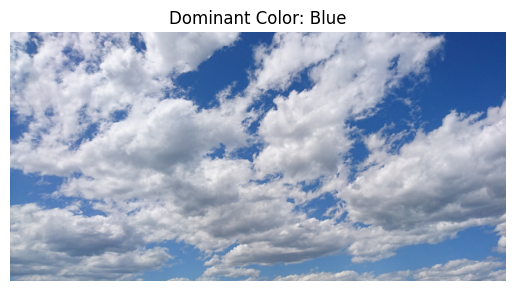

In [21]:
plt.imshow(rgb)                                 # plot image
plt.title(f"Dominant Color: {table[dominant]}") # title chart with color
plt.axis("off")                                 # remove axis
plt.show()                                      # display

## Summary

* `OpenCV` is a powerful library for computer vision.
* Computers read images as pixel values rather than colors
* Colors can be split into red, blue, or green channels
* You can identify dominant colors by calculating the average intensity of each channel

## Author and Liscense

This notebook was authored by Aiden Flynn and is available under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0.txt) Liscense.

[Kaggle](https://www.kaggle.com/flynn28) | [Github](https://github.com/flynn-28/)